# Data NutA

Dataset harus disiapkan terlebih dahulu, buat csv biasa aja, ubah , menjadi . Lalu hapus sebagai delimiter nanti cukup gunakan , saja

In [7]:
import os
import pandas as pd

data = pd.read_csv('nutA1.csv', delimiter=';')
data1 = data[["Volume Tandon (L)", "Waktu (s)", "Delta TDS (ppm)"]]
data2 = data1.groupby(["Volume Tandon (L)", "Waktu (s)"]).mean()[["Delta TDS (ppm)"]]
df = data2.reset_index()
df

,Volume Tandon (L),Waktu (s),Delta TDS (ppm)
0,40,1,5.0
1,40,2,10.0
2,40,3,12.8
3,40,4,14.0
4,40,5,12.0
...,...,...,...
415,100,56,127.7
416,100,57,131.3
417,100,58,132.5
418,100,59,135.7


Untuk dataset final, hapus bagian rata rata delta ph, phawal dan phakhir

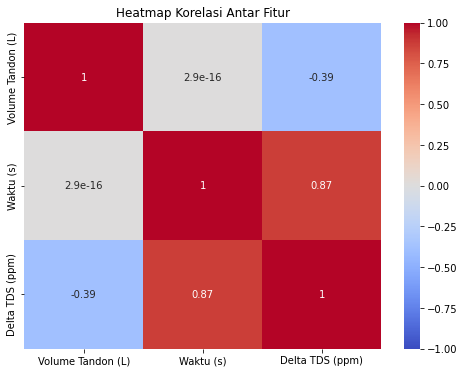

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antar fitur
correlation_matrix = df.corr()

# Menampilkan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

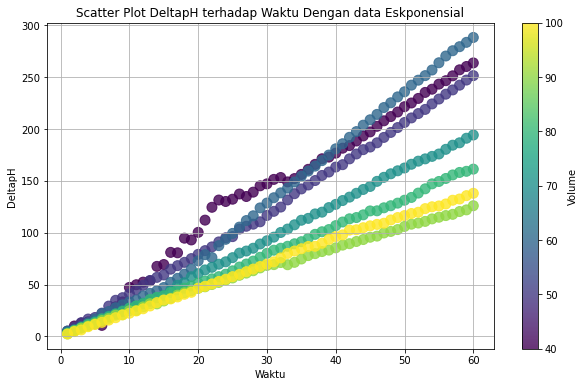

<Figure size 432x288 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot scatter DeltapH dengan volume sebagai warna
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Waktu (s)"], df["Delta TDS (ppm)"], c=df["Volume Tandon (L)"], cmap='viridis', s=100, alpha=0.8)
plt.colorbar(scatter, label='Volume')
plt.title('Scatter Plot DeltapH terhadap Waktu Dengan data Eskponensial')
plt.xlabel('Waktu')
plt.ylabel('DeltapH')
plt.grid(True)
plt.show()

# Simpan plot sebagai gambar PNG
plt.savefig('DataEskponensial.png', format='png', dpi=300)

# Split Data

In [10]:
from sklearn.model_selection import train_test_split

# Fitur (Volume dan DeltapH) dan Target (Waktu)
X = df[["Volume Tandon (L)", "Delta TDS (ppm)"]]
y = df["Waktu (s)"]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=42)
print("Banyaknya data training: ", y_train.shape)
print("Banyaknya data test: ", y_test.shape)

Banyaknya data training:  (294,)
Banyaknya data test:  (126,)


# LinearRegression

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi dengan data test
y_pred = model.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", model.coef_[0])
print("Koefisien Delta: ", model.coef_[1])
print("Intercept:", model.intercept_)
print("\n")

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print("Model dapat menjelaskan ", r2 * 100, "% dari variansi dalam data")
print("\n")

print("\n")

volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = model.coef_[0]
b = model.coef_[1]
c = model.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = model.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)


Koefisien Volume:  0.3541461258988796
Koefisien Delta:  0.2586508782369603
Intercept: -20.67649883516468


Evaluasi Model:
Mean Squared Error (MSE): 35.32116332125013
Root Mean Squared Error (RMSE): 5.943161054628264
Mean Absolute Error (MAE): 4.425342348414689
R-squared: 0.880842040163058
Model dapat menjelaskan  88.0842040163058 % dari variansi dalam data




Manual:  17.046273889604905
Model 17.04627388960491
Selisih -7.105427357601002e-15


# Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Parameter range untuk alpha yang akan diuji
alpha_range = np.logspace(-4, 4, 50)  # Dari 10^-4 hingga 10^4

# Model Ridge dengan GridSearchCV untuk mencari alpha terbaik
ridge_model = Ridge()
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Melakukan pencarian nilai alpha terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dan alpha terbaik
best_ridge = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print(f"Nilai alpha terbaik: {best_alpha}")

# Melakukan prediksi dengan data test menggunakan model terbaik
y_pred = best_ridge.predict(X_test)

# Menampilkan koefisien dan intercept dari model terbaik
print("Koefisien Volume: ", best_ridge.coef_[0])
print("Koefisien Delta: ", best_ridge.coef_[1])
print("Intercept: ", best_ridge.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat menjelaskan ", r2 * 100, "% dari variansi dalam data")
print("\n")

volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = best_ridge.coef_[0]
b = best_ridge.coef_[1]
c = best_ridge.intercept_

# Manual perhitungan
manual = a * x1 + b * x2 + c
print("Manual: ", manual)

# Prediksi dengan model
model = best_ridge.predict([[x1, x2]])[0]
print("Model:", model)

# Selisih
print("Selisih:", manual - model)


Nilai alpha terbaik: 719.6856730011514
Koefisien Volume:  0.35110016525019866
Koefisien Delta:  0.25816963691494454
Intercept:  -20.412122934284

Evaluasi Model:
Mean Squared Error (MSE): 35.2633549403274
Root Mean Squared Error (RMSE): 5.938295625878473
Mean Absolute Error (MAE): 4.413364250996484
R-squared: 0.8810370600345605
Model dapat menjelaskan  88.10370600345605 % dari variansi dalam data


Manual:  17.073370478977132
Model: 17.073370478977132
Selisih: 0.0


## Ridge Regression With CV

In [18]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Menentukan range nilai alpha yang akan dievaluasi
alphas = np.logspace(-4, 4, 50)  # Dari 10^-4 hingga 10^4

# Membuat model RidgeCV
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

# Melatih model dengan data training
ridge_cv.fit(X_train, y_train)

# Mendapatkan nilai alpha terbaik
best_alpha = ridge_cv.alpha_
print(f"Nilai alpha terbaik: {best_alpha}")

# Melakukan prediksi dengan data test
y_pred = ridge_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model terbaik
print("Koefisien Volume: ", ridge_cv.coef_[0])
print("Koefisien DeltapH: ", ridge_cv.coef_[1])
print("Intercept: ", ridge_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat menjelaskan ", r2 * 100, "% dari variansi dalam data")
print("\n")

volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = ridge_cv.coef_[0]
b = ridge_cv.coef_[1]
c = ridge_cv.intercept_

# Manual perhitungan
manual = a * x1 + b * x2 + c
print("Manual: ", manual)

# Prediksi dengan model
model = ridge_cv.predict([[x1, x2]])[0]
print("Model:", model)

# Selisih
print("Selisih:", manual - model)


Nilai alpha terbaik: 719.6856730011514
Koefisien Volume:  0.35110016525019866
Koefisien DeltapH:  0.25816963691494454
Intercept:  -20.412122934284

Evaluasi Model:
Mean Squared Error (MSE): 35.2633549403274
Root Mean Squared Error (RMSE): 5.938295625878473
Mean Absolute Error (MAE): 4.413364250996484
R-squared: 0.8810370600345605
Model dapat menjelaskan  88.10370600345605 % dari variansi dalam data


Manual:  17.073370478977132
Model: 17.073370478977132
Selisih: 0.0


# Lasso

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Membuat model dengan pencarian nilai alpha otomatis
lss_cv = LassoCV(cv=5)  # 'cv=5' menggunakan 5-fold cross-validation
lss_cv.fit(X_train, y_train)

# Menampilkan nilai alpha yang dipilih secara otomatis
print(f"Nilai alpha yang dipilih: {lss_cv.alpha_}")

# Melakukan prediksi dengan data test
y_pred = lss_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", lss_cv.coef_[0])
print("Koefisien DeltapH: ", lss_cv.coef_[1])
print("Intercept: ", lss_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Testing
volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = lss_cv.coef_[0]
b = lss_cv.coef_[1]
c = lss_cv.intercept_

# manual
manual = a * x1 + b * x2 + c
print("Manual: ", manual)

# pakai model
model = lss_cv.predict([[x1, x2]])[0]
print("Model", model)

# selisih
print("Selisih", manual - model)


Nilai alpha yang dipilih: 1.0510650932481838
Koefisien Volume:  0.35031486912915527
Koefisien DeltapH:  0.2579924526993586
Intercept:  -20.338499478530238

Evaluasi Model:
Mean Squared Error (MSE): 35.25175676601403
Root Mean Squared Error (RMSE): 5.9373189880630495
Mean Absolute Error (MAE): 4.410079275983618
R-squared: 0.8810761871373811
Model dapat dapat menjelaskan  88.1076187137381 % dari variansi dalam data


Manual:  17.083163995478557
Model 17.083163995478564
Selisih -7.105427357601002e-15


# Lasso CV

In [21]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Menentukan range nilai alpha yang akan dievaluasi
alphas = np.logspace(-4, 4, 50)  # Rentang dari 10^-4 hingga 10^4

# Membuat model LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)

# Melatih model dengan data training
lasso_cv.fit(X_train, y_train)

# Mendapatkan nilai alpha terbaik
best_alpha = lasso_cv.alpha_
print(f"Nilai alpha terbaik: {best_alpha}")

# Melakukan prediksi dengan data test
y_pred = lasso_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model terbaik
print("Koefisien Volume: ", lasso_cv.coef_[0])
print("Koefisien DeltapH: ", lasso_cv.coef_[1])
print("Intercept: ", lasso_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat menjelaskan ", r2 * 100, "% dari variansi dalam data")
print("\n")

# Testing
volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = lasso_cv.coef_[0]
b = lasso_cv.coef_[1]
c = lasso_cv.intercept_

# Manual perhitungan
manual = a * x1 + b * x2 + c
print("Manual: ", manual)

# Prediksi dengan model
model = lasso_cv.predict([[x1, x2]])[0]
print("Model:", model)

# Selisih
print("Selisih:", manual - model)


Nilai alpha terbaik: 0.5689866029018293
Koefisien Volume:  0.35207129671809906
Koefisien DeltapH:  0.25829435163728365
Intercept:  -20.49345893180005

Evaluasi Model:
Mean Squared Error (MSE): 35.28198794613173
Root Mean Squared Error (RMSE): 5.939864303679986
Mean Absolute Error (MAE): 4.416831487554158
R-squared: 0.8809742005263081
Model dapat menjelaskan  88.09742005263081 % dari variansi dalam data


Manual:  17.06624942033107
Model: 17.06624942033107
Selisih: 0.0


# ElasticNetCV

In [22]:
from sklearn.linear_model import ElasticNetCV

# Membuat model
eln_cv = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1])
eln_cv.fit(X_train,y_train)

# Melakukan prediksi dengan data test
y_pred = eln_cv.predict(X_test)

# Menampilkan koefisien dan intercept dari model
print("Koefisien Volume: ", eln_cv.coef_[0])
print("Koefisien DeltapH: ", eln_cv.coef_[1])
print("Intercept: ", eln_cv.intercept_)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("R-squared:", r2)
print("Model dapat dapat menjelaskan ", r2*100,"% dari variansi dalam data")
print("\n")

# Test
volume = 70
nut_awal = 180
nut_target = 230
deltanut = nut_target - nut_awal

x1 = volume
x2 = deltanut

a = eln_cv.coef_[0]
b = eln_cv.coef_[1]
c = eln_cv.intercept_

# manual
manual = a*x1 + b*x2 + c 
print("Manual: ", manual)

# pakai model
model = eln_cv.predict([[x1,x2]])[0] 
print("Model", model)

# selisih
print("Selisih", manual - model)

Koefisien Volume:  0.35031486912915527
Koefisien DeltapH:  0.2579924526993586
Intercept:  -20.338499478530238

Evaluasi Model:
Mean Squared Error (MSE): 35.25175676601403
Root Mean Squared Error (RMSE): 5.9373189880630495
Mean Absolute Error (MAE): 4.410079275983618
R-squared: 0.8810761871373811
Model dapat dapat menjelaskan  88.1076187137381 % dari variansi dalam data


Manual:  17.083163995478557
Model 17.083163995478564
Selisih -7.105427357601002e-15
